K Means Documentation
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [1]:
import pandas as pd
import numpy as np

In [2]:
news = pd.read_csv('np.csv')
news.columns = ['time','sections','persons']

In [3]:
news.head()

,time,sections,persons
0,0,0,370
1,1,0,9
2,1,1,127
3,1,2,119
4,1,3,55


In [4]:
news.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   time      53 non-null     int64
 1   sections  53 non-null     int64
 2   persons   53 non-null     int64
dtypes: int64(3)
memory usage: 1.4 KB


In [5]:
news['persons'].sum()

2939

In [6]:
# expanding the dataset to get rid of the count value
newsupdated = pd.DataFrame(news.values.repeat(news.persons, axis=0), columns=news.columns)

In [7]:
newsupdated.head()

,time,sections,persons
0,0,0,370
1,0,0,370
2,0,0,370
3,0,0,370
4,0,0,370


In [8]:
# Check for missing using count
newsupdated.count()

time        2939
sections    2939
persons     2939
dtype: int64

In [9]:
newsupdated.describe()

,time,sections,persons
count,2939.000000,2939.000000,2939.000000
mean,3.370534,3.394012,103.913916
std,2.369500,2.253787,104.837641
min,0.000000,0.000000,1.000000
25%,1.000000,2.000000,47.000000
50%,3.000000,3.000000,67.000000
75%,6.000000,5.000000,103.000000
max,7.000000,7.000000,370.000000


## In the next few statements we will try some visualizations to understand the dataset better

In [10]:
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
sns.kdeplot(newsupdated['persons'])
#analyse the distribution of the sections using probability (y axis)

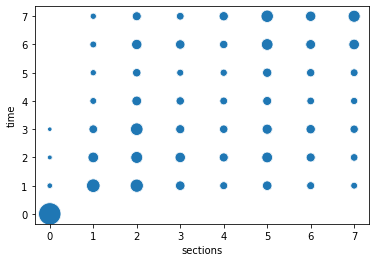

In [12]:
sns.scatterplot(x = 'sections', y = 'time', data = newsupdated, size= 'persons', sizes = (20, 500),legend = False) #actual values

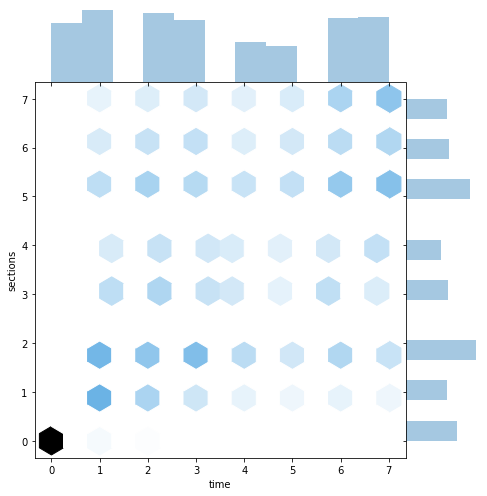

In [13]:
#Another option to visualize a joint distrbution 

sns.jointplot(x = 'time', y= 'sections', data= newsupdated, kind="hex",height=7, space=0)


## The below visualization gives us some insights about the different newspaper habits that might exist in the dataset

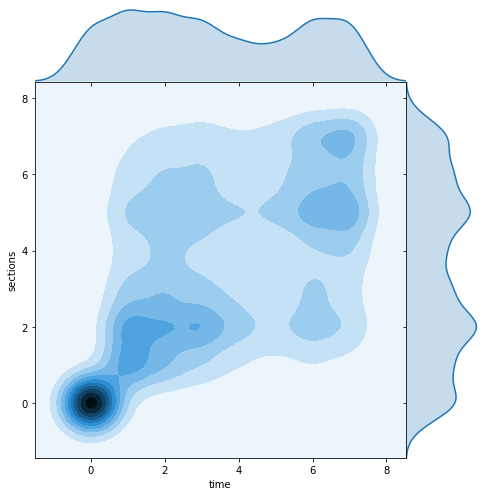

In [17]:
sns.jointplot(x = 'time', y= 'sections', data= newsupdated, kind="kde",height=7, space=0)

In [18]:
newsupdated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   time      2939 non-null   int64
 1   sections  2939 non-null   int64
 2   persons   2939 non-null   int64
dtypes: int64(3)
memory usage: 69.0 KB


## Now we will run the k means clustering using sklearn library 

In [19]:
from sklearn.cluster import KMeans

In [20]:
model5 = KMeans(n_clusters = 5)
news1 = newsupdated.iloc[:,0:2]
model5.fit(news1)
#news1

KMeans(n_clusters=5)

## The attribute cluster_centers_ gives the centroid of cluster centers for the 5 clusters 

In [21]:
model5.cluster_centers_

array([[5.3647541 , 2.38729508],
       [1.98693759, 2.31640058],
       [6.28120516, 5.67718795],
       [0.27897839, 0.24950884],
       [2.51618705, 5.6294964 ]])

## The labels_ attribute gives the cluster label for k clusters 

In [22]:
model5.labels_

array([3, 3, 3, ..., 2, 2, 2])

In [23]:
# Adding the lables to the dataset
newsupdated['cluster'] = model5.labels_

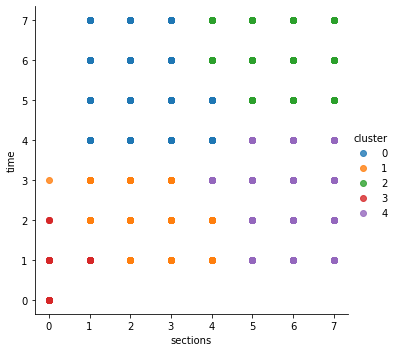

In [24]:
#Very useful plotting function from seaborn . 
# Read https://seaborn.pydata.org/generated/seaborn.lmplot.html
sns.lmplot( x="sections", y="time", data=newsupdated, fit_reg= False, hue='cluster', legend=True)


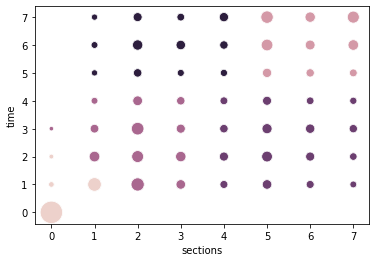

In [71]:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
# students can try to add different shape of the markers 
# style = 'cluster'
sns.scatterplot(x = 'sections', y = 'time', data = newsupdated, size= 'persons', legend = False , sizes = (20, 500), hue ='cluster')

## attribute inertia_ gives the  SSE for the final clusters for k = 5  

In [43]:
model5.inertia_ 

4247.132351999837

In [19]:
#sse
sse = pd.Series(range(14),index = range(1,15))
sse

1      0
2      1
3      2
4      3
5      4
6      5
7      6
8      7
9      8
10     9
11    10
12    11
13    12
14    13
dtype: int64

In [20]:
for i in range(1,15):
    model5 = KMeans(n_clusters = i)
    model5.fit(news1)
    sse[i] = model5.inertia_
print(sse)

1     31419
2     14236
3      9019
4      5910
5      4258
6      3627
7      3011
8      2471
9      2109
10     1858
11     1741
12     1630
13     1468
14     1382
dtype: int64


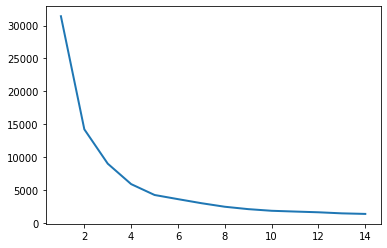

In [21]:
plt.plot(sse.index, sse, linewidth=2.0)